In [1]:
import numpy as np
import collections

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 120)

from gradvi.tests import toy_data
from gradvi.tests import toy_priors
from gradvi.inference import LinearRegression
from gradvi.inference import Trendfiltering
from gradvi.models import basis_matrix as gvbm
from gradvi.optimize import moving_average as gvma

from mrashpen.utils import R_trendfilter

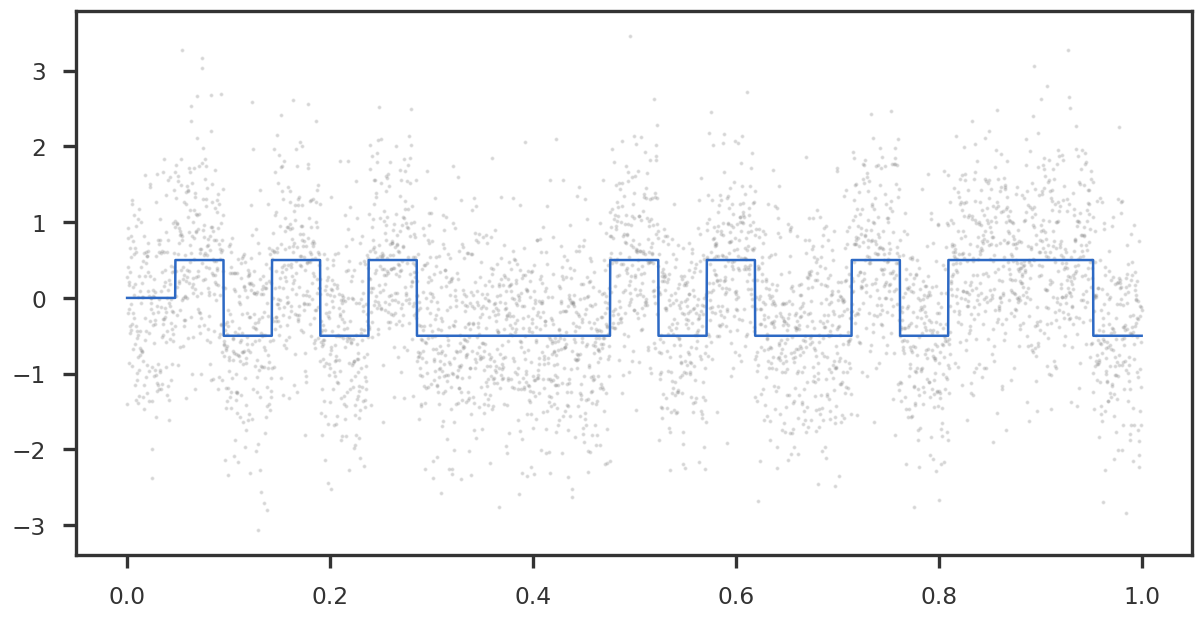

In [4]:
np.random.seed(100)

#dims = np.power(2, 7 + np.arange(2))
n = 4096
data = dict()
degree = 0
nknots = 20
strue  = 0.8
knots  = np.linspace(0, 1, nknots+2)[1:-1]

# Gamma signal
def sample_sign(n, f = 0.5):
    #np.random.seed(1000)
    return np.random.choice([-1, 1], size=n, p=[f, 1 - f])
params = [1, 0.1]
np.random.seed(1000)
#bfix = np.random.gamma(params[0], params[1], size = nknots + degree)
#bfix = np.random.normal(0, 1, size = nknots + degree)
bfix = np.repeat(0.5, nknots + degree)
bfix = np.multiply(bfix, sample_sign(nknots + degree))


x = np.linspace(0, 1, n)
data = toy_data.changepoint_from_bspline(x, knots, strue, degree = degree, 
                signal = "fixed", seed = 100, bfix = bfix,
                include_intercept = False)

fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(data.x, data.y, s = 2, color = 'grey', alpha = 0.2)
ax1.plot(data.x, data.ytrue)
plt.show()

In [5]:
tf_y, tf_fit = R_trendfilter.fit(data.y, order = degree)
#tf_bhat  = np.dot(data.Hinv, tf_y)

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 



R[write to console]: Loading required package: Matrix



In [6]:
prior_init = toy_priors.get_ash_scaled(k = 20, sparsity = None, skbase = 2.0, skfactor = 10.0)
gv1 = Trendfiltering(maxiter = 20000, standardize_basis = False, standardize = True)
#gv1.fit(data.y, degree, prior_init)
gv1.fit(data.y, degree, prior_init, y_init = tf_y)

In [8]:
print (f"GradVI terminated in {gv1.niter} iterations.")

GradVI terminated in 1210 iterations.


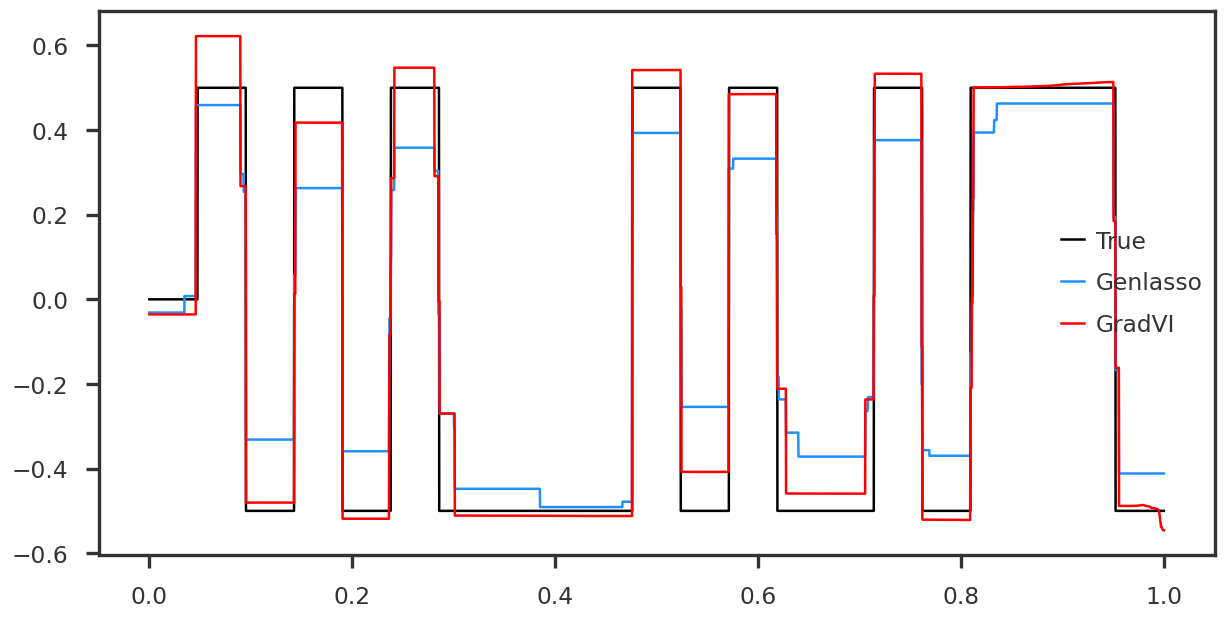

In [9]:
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(111)
#ax1.scatter(data.x, data.y, s = 2, color = 'grey', alpha = 0.2)
ax1.plot(data.x, data.ytrue, label = 'True', color = 'black')
ax1.plot(data.x, tf_y, label = 'Genlasso', color = 'dodgerblue')
ax1.plot(data.x, gv1.ypred, label = 'GradVI', color = 'red')

ax1.legend()

#fig.savefig("trendfiltering_example_gamma_large_se.pdf", bbox_inches = 'tight')
plt.show()

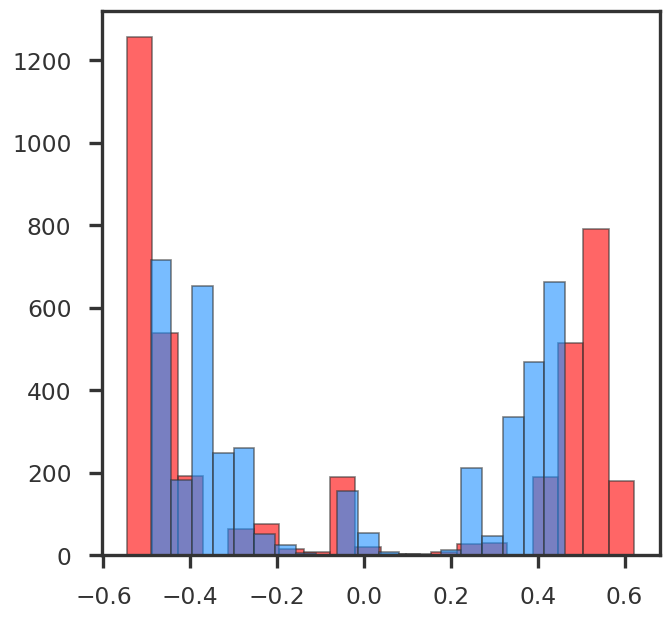

In [10]:
fig = plt.figure(figsize = (6, 6))
ax1 = fig.add_subplot(111)
ax1.hist(gv1.ypred, alpha = 0.6, color = 'red')
ax1.hist(tf_y, alpha = 0.6, color = 'dodgerblue')
plt.show()